# Observed Values

Maximum element in array is:
 3147.0
Index of maximum array is:
 (array([40], dtype=int64),)


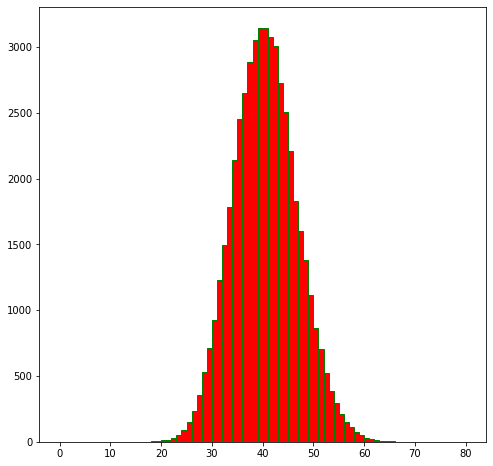

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import style
import math
import decimal
#import plotly.express as px
from numpy import asarray
from numpy import savetxt

# Data is read from the CSV file and saved to a container 
cols = ['iAT', 'PacketSize']
data = pd.read_csv('udp_rcvd_vector.csv',
    delimiter=',', skiprows=[0], names=cols)
X = data['iAT']
df = pd.DataFrame(data)

# Time is divided into interval and corresponding data points are also arranged accordingly   
max_time = float(math.ceil(df['iAT'].max()))
min_time = float(math.floor(df['iAT'].min()))

df_summary = df["iAT"].groupby(pd.cut(df["iAT"], 
            np.arange(min_time, max_time+0.4, 0.4),labels=np.arange(int(min_time),int(max_time), 
            decimal.Decimal('0.4')))).count().to_frame('Occurrences').reset_index()

df2_summary = df_summary.astype(float)

#df2_summary['Throughput'] = df2_summary['rxPkOk_Sum']/df2_summary['Sim_T']

# Genenerated vectors from the previous setp are written to a seperate CSV file 
with open('iAT_data.csv', 'w') as csv_file:
    df2_summary.to_csv(path_or_buf=csv_file)
    
# Newly generated data is read in the following block of code for further processing and plotting 
columns = ['Serial_Num', 'iAT', 'Occurance_count']
df = pd.read_csv('iAT_data.csv',delimiter=',', skiprows=[0], names=columns)

x = df['iAT']
y = df['Occurance_count']
plt.figure(figsize=(8,8))
(n, bins, patches) = plt.hist(y, bins = range(0,81) , color = "red", ec="green")

# The following line supresses the scientific notation of data recodrding 
np.set_printoptions(suppress=True)
data = asarray(n)

# Packet count vector is saved to a new csv file
savetxt('data.csv', data, delimiter=',')
print("Maximum element in array is:\n", numpy.amax(n))
print("Index of maximum array is:\n", numpy.where(n == numpy.amax(n)))

# Expected Values

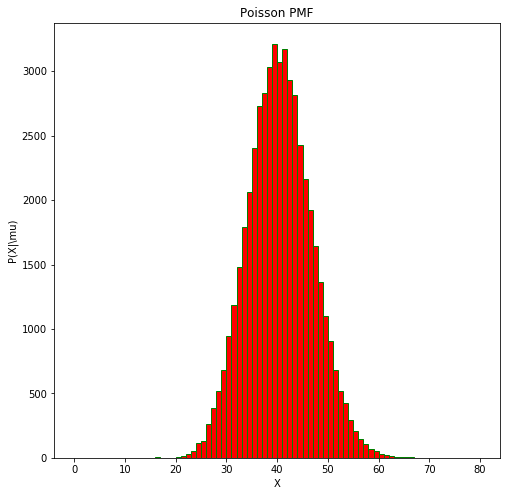

[   0.            0.            0.            0.            0.00000002
    0.00000019    0.00000124    0.00000706    0.00003527    0.00015666
    0.00062622    0.00227566    0.00758046    0.02330891    0.0665524
    0.17735452    0.44309011    1.04186852    2.31371679    4.8677289
    9.72895452   18.51896301   33.64834972   58.47977848   97.40118997
  155.73780157  239.43656725  354.48388685  506.06727374  697.55754593
  929.45543665 1198.49620699 1497.11951441 1813.47810736 2132.07847527
 2435.03342498 2703.7853585  2921.05862689 3072.74458919 3149.42768801
 3147.32387031 3068.50873948 2920.43711966 2714.87094666 2466.41582988
 2190.90512365 1903.86226002 1619.22594045 1348.45358127 1100.0431137
  879.44662792  689.30130006  529.87757445  399.64046508  295.83222611
  215.00698922  153.47383183  107.62899039   74.17730636   50.25610571
   33.48168975   21.94054032   14.14573164    8.97541733    5.60588859
    3.44747314    2.08798196    1.24572369    0.73228915    0.42423187
    0.242

In [183]:
import scipy.stats 
import numpy
import numpy as np
import pandas as pd
from scipy.stats import poisson

# We are required to generate an expected array with the same mean as the observed array
n_pts = 50000
columns = ['Serial_Num', 'iAT', 'Occurance_count']
df = pd.read_csv('iAT_data.csv',delimiter=',', skiprows=[0], names=columns)
x =  df['Occurance_count']

# Following line of code generates the mean value for the observed data
poisson_mean = df['Occurance_count'].mean() 

# This block of code generates random data following the poisson distribution around the given mean value
plt.figure(figsize=(8,8))
poisdata = np.random.poisson(poisson_mean, n_pts)
(m, bins, patches) = plt.hist(poisdata, bins = range(0,81) , color = "red", ec="green")
plt.xlabel("X")
plt.ylabel("P(X|\mu)")
plt.title("Poisson PMF")
plt.show()

# Here we calculate the pdf for each bin and multiply it by the total count to get expected array of poisson distributed data
expected_count = []
for i in range(80):
    expected_count.append(n_pts *  poisson.pmf(i,poisson_lambda ))   
expected_count = np.array(expected_count)
print(expected_count)


# Expected array of data is saved to csv file
savetxt('expected_count.csv', expected_count, delimiter=',')


# Chi-Square Test

In [184]:
from scipy.stats import chisquare

cols = ['obs']
obs = pd.read_csv('data.csv',delimiter=',', skiprows=[0], names = cols)
observed_vals = obs['obs']

cols1 = ['exp']
exp = pd.read_csv('expected_count.csv',delimiter=',', skiprows=[0], names=cols1)
expected_vals = exp['exp']
#print(observed_vals)
#print(expected_vals)
chi_square = chisquare( observed_vals, f_exp = expected_vals, ddof = 1, axis = 0)
print(chi_square)

Power_divergenceResult(statistic=67.42110853588304, pvalue=0.7740072672418913)
